In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
distance_vec = [3, 5]
encoded_state = "1"

In [3]:
def p_error(n, e):
    return 0.5*(1.0 - (1.0 - 2.0*e)**n) 

In [4]:
file_names = ["data_google_active_reset.npz",
              "data_qm_active_reset.npz",
              "data_qm_apt.npz"]

titles = ["Active reset (Google)",
          "Active reset (QM)",
          "APT (QM)"]

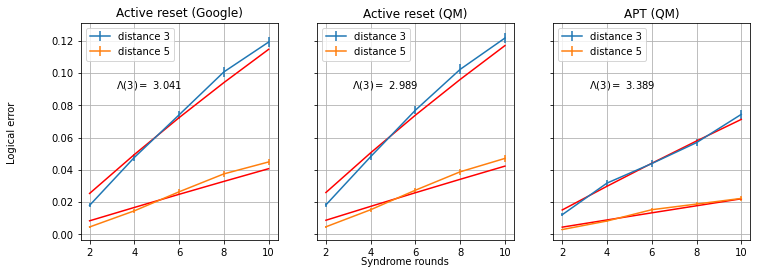

In [5]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, hspace=0)
axs =  gs.subplots(sharey=True)
for j in range(3):
    with np.load(file_names[j]) as data:
        rounds_vec = data['rounds_vec']
        trace_distance_matrix = data['trace_distance_matrix']
        success_sigma_matrix = data['success_sigma_matrix']

    e_logical = []
    for i in range(2):
        popt, pcov = curve_fit(p_error, rounds_vec, trace_distance_matrix[i],
                               sigma=success_sigma_matrix[i], bounds=(0.0, 0.5))

        axs[j].errorbar(rounds_vec, trace_distance_matrix[i], yerr=success_sigma_matrix[i],
                    label=f"distance {distance_vec[i]}")
        axs[j].plot(rounds_vec, p_error(rounds_vec, *popt), 'r-')
        e_logical.append(popt[0])
    axs[j].legend(loc='upper left')
    axs[j].grid('all')
    axs[j].annotate(f"$\Lambda(3) =$ "+"{:.3f}".format(e_logical[0]/e_logical[1]), 
                    xy=(0.18, 0.7), xycoords='axes fraction')
    axs[j].set_title(titles[j])
    
fig.text(0.5, 0.04, 'Syndrome rounds', ha='center')
fig.text(0.04, 0.5, 'Logical error', va='center', rotation='vertical')
plt.savefig("repetition_code.png", dpi=300)